# Parkinson Disease Diagnosis

Kaggle: https://www.kaggle.com/debasisdotcom/parkinson-disease-detection

Features Information:
    
name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency
    
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
    
MDVP:Flo(Hz) - Minimum vocal fundamental frequency
    
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
                    
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

<b>Citation Request: </b>
    
If you use this dataset, please cite the following paper:

'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection',
Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM.
BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Parkinsson disease.csv")

In [3]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


## EDA

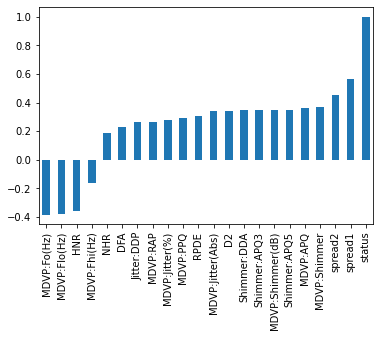

In [7]:
df.corr()['status'][:-1].sort_values().plot(kind='bar')

In [8]:
df = df.drop('name', axis = 1)

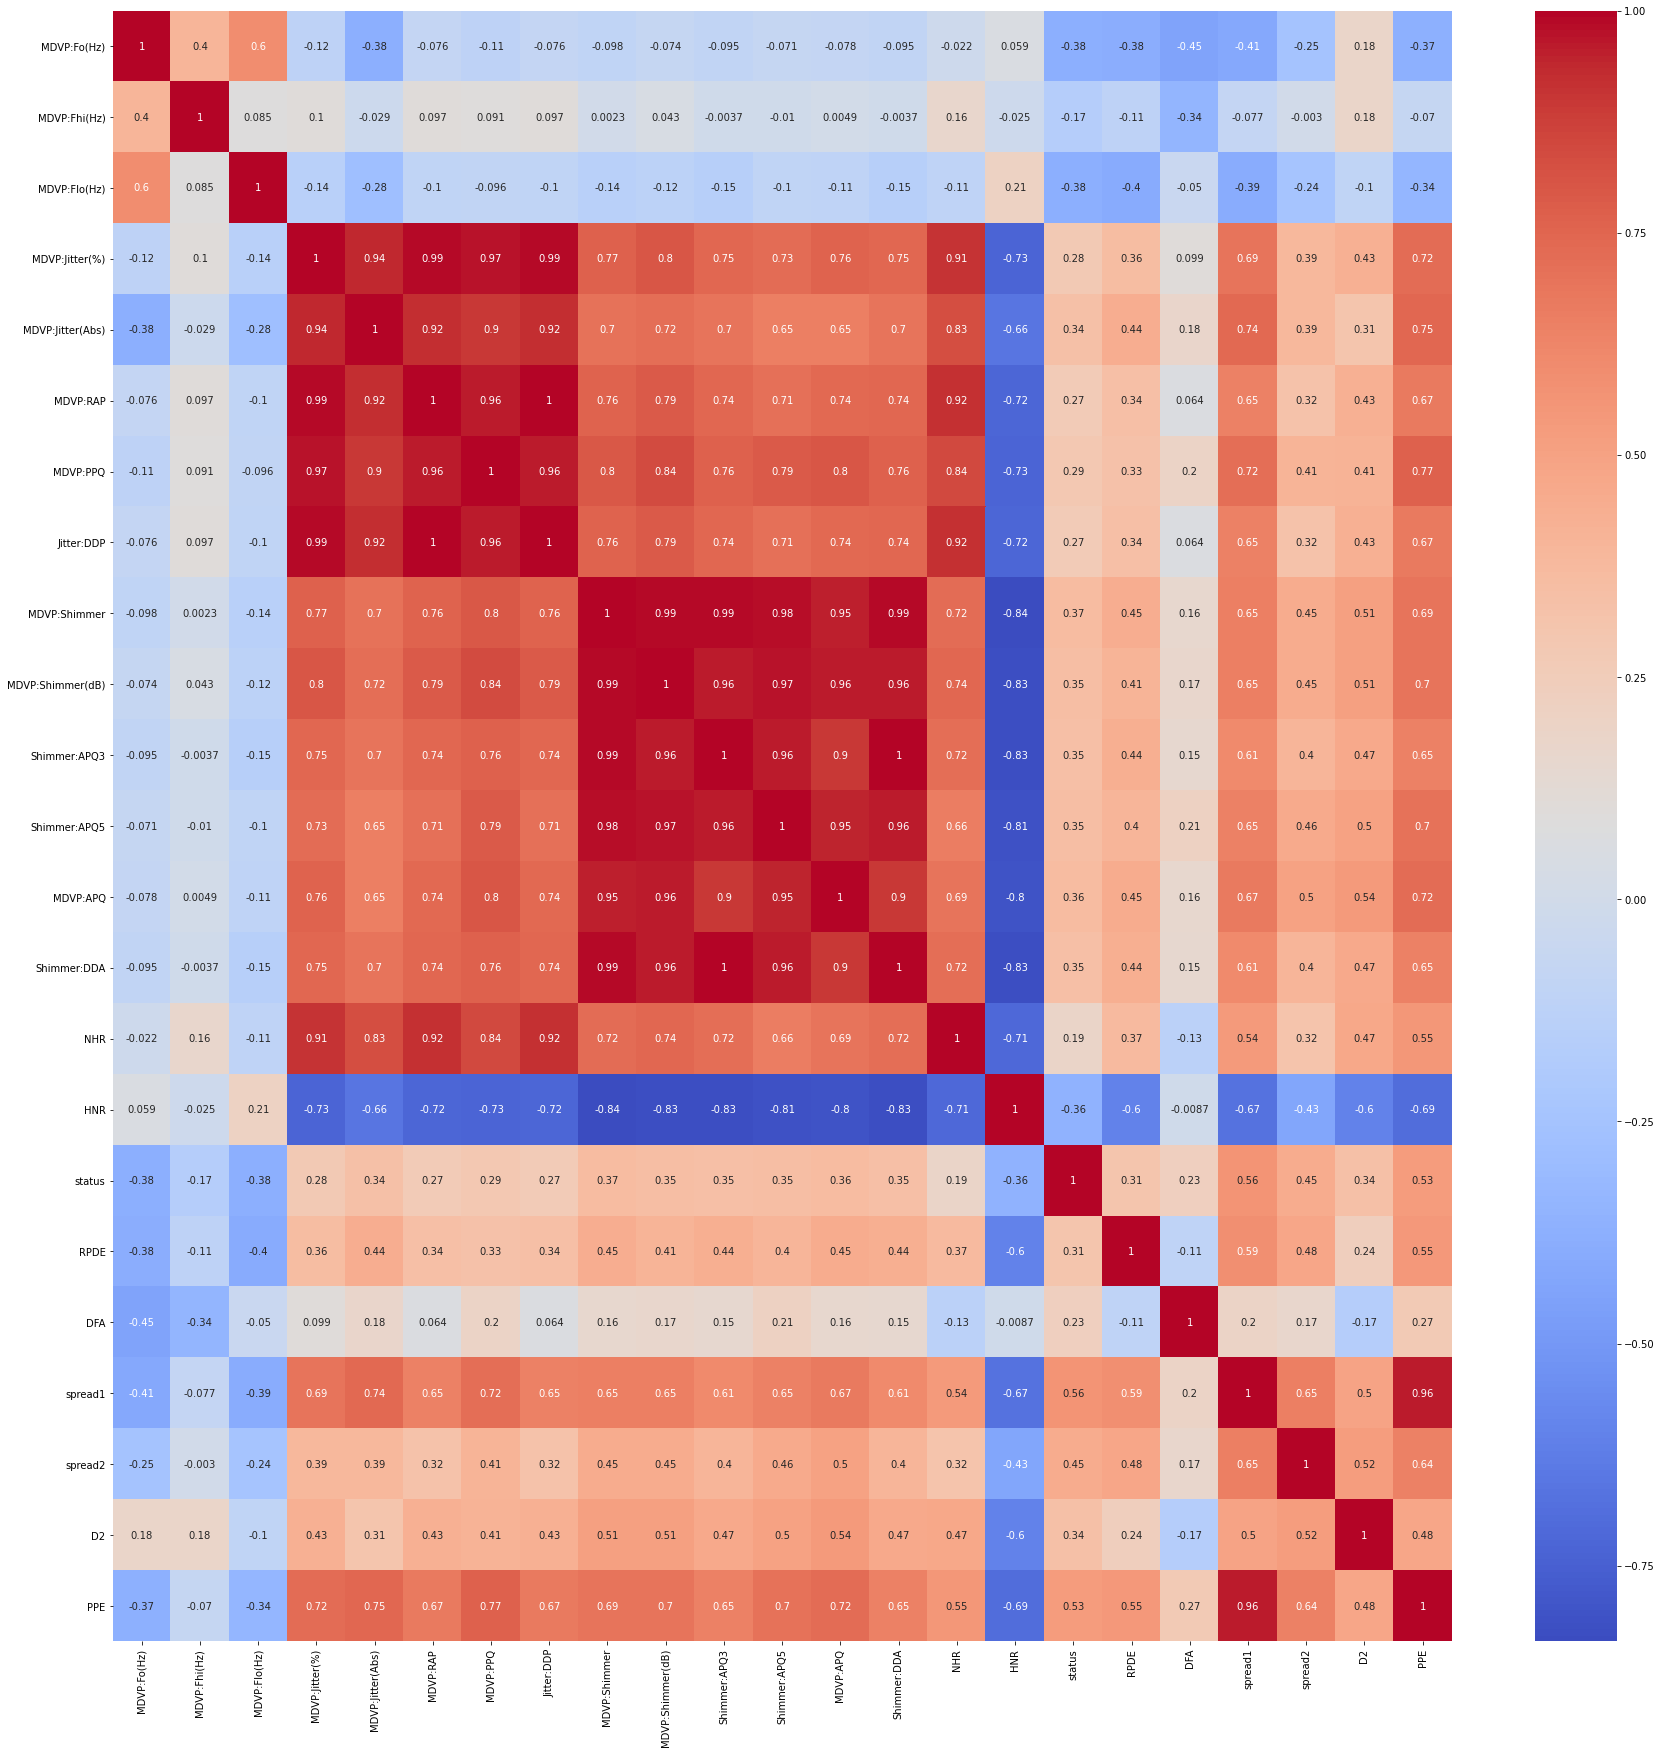

In [9]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot = True, cmap= "coolwarm")

# <font color='green'><b> NEURAL NETWORKS </b> (Multi-Layer Perceptron)</font>

In [10]:
X = df.drop('status', axis = 1)
Y = df['status']

### Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=101)

### Scaling Data

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [13]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
X_train_scaled.shape

(146, 22)

### Creating The Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [16]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=25,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
cb = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [18]:
model.fit(x=X_train_scaled,y=Y_train, validation_data=(X_test_scaled, Y_test), batch_size=450, epochs=600, callbacks=[cb])

Epoch 1/600
1/1 [==============================] - 1s 848ms/step - loss: 0.6784 - val_loss: 0.6605
Epoch 2/600
1/1 [==============================] - 0s 19ms/step - loss: 0.6617 - val_loss: 0.6554
Epoch 3/600
1/1 [==============================] - 0s 21ms/step - loss: 0.6578 - val_loss: 0.6504
Epoch 4/600
1/1 [==============================] - 0s 22ms/step - loss: 0.6517 - val_loss: 0.6456
Epoch 5/600
1/1 [==============================] - 0s 20ms/step - loss: 0.6317 - val_loss: 0.6410
Epoch 6/600
1/1 [==============================] - 0s 21ms/step - loss: 0.6434 - val_loss: 0.6366
Epoch 7/600
1/1 [==============================] - 0s 19ms/step - loss: 0.6481 - val_loss: 0.6322
Epoch 8/600
1/1 [==============================] - 0s 20ms/step - loss: 0.6159 - val_loss: 0.6278
Epoch 9/600
1/1 [==============================] - 0s 18ms/step - loss: 0.6219 - val_loss: 0.6236
Epoch 10/600
1/1 [==============================] - 0s 18ms/step - loss: 0.6280 - val_loss: 0.6194
Epoch 11/600
1/1 [

Epoch 84/600
1/1 [==============================] - 0s 18ms/step - loss: 0.4404 - val_loss: 0.3917
Epoch 85/600
1/1 [==============================] - 0s 18ms/step - loss: 0.4793 - val_loss: 0.3899
Epoch 86/600
1/1 [==============================] - 0s 18ms/step - loss: 0.4689 - val_loss: 0.3883
Epoch 87/600
1/1 [==============================] - 0s 17ms/step - loss: 0.4399 - val_loss: 0.3868
Epoch 88/600
1/1 [==============================] - 0s 16ms/step - loss: 0.4380 - val_loss: 0.3853
Epoch 89/600
1/1 [==============================] - 0s 17ms/step - loss: 0.4375 - val_loss: 0.3837
Epoch 90/600
1/1 [==============================] - 0s 16ms/step - loss: 0.4690 - val_loss: 0.3825
Epoch 91/600
1/1 [==============================] - 0s 17ms/step - loss: 0.4405 - val_loss: 0.3815
Epoch 92/600
1/1 [==============================] - 0s 19ms/step - loss: 0.4417 - val_loss: 0.3807
Epoch 93/600
1/1 [==============================] - 0s 20ms/step - loss: 0.4344 - val_loss: 0.3798
Epoch 94/6

1/1 [==============================] - 0s 17ms/step - loss: 0.3921 - val_loss: 0.3284
Epoch 167/600
1/1 [==============================] - 0s 17ms/step - loss: 0.3652 - val_loss: 0.3268
Epoch 168/600
1/1 [==============================] - 0s 17ms/step - loss: 0.3909 - val_loss: 0.3252
Epoch 169/600
1/1 [==============================] - ETA: 0s - loss: 0.379 - 0s 17ms/step - loss: 0.3798 - val_loss: 0.3240
Epoch 170/600
1/1 [==============================] - 0s 17ms/step - loss: 0.3835 - val_loss: 0.3228
Epoch 171/600
1/1 [==============================] - 0s 17ms/step - loss: 0.3960 - val_loss: 0.3221
Epoch 172/600
1/1 [==============================] - 0s 18ms/step - loss: 0.3835 - val_loss: 0.3215
Epoch 173/600
1/1 [==============================] - ETA: 0s - loss: 0.383 - 0s 18ms/step - loss: 0.3834 - val_loss: 0.3204
Epoch 174/600
1/1 [==============================] - 0s 17ms/step - loss: 0.3822 - val_loss: 0.3197
Epoch 175/600
1/1 [==============================] - 0s 17ms/step 

1/1 [==============================] - 0s 18ms/step - loss: 0.2742 - val_loss: 0.1980
Epoch 248/600
1/1 [==============================] - 0s 18ms/step - loss: 0.2594 - val_loss: 0.1960
Epoch 249/600
1/1 [==============================] - 0s 17ms/step - loss: 0.2660 - val_loss: 0.1933
Epoch 250/600
1/1 [==============================] - 0s 17ms/step - loss: 0.2509 - val_loss: 0.1912
Epoch 251/600
1/1 [==============================] - 0s 17ms/step - loss: 0.2650 - val_loss: 0.1897
Epoch 252/600
1/1 [==============================] - 0s 18ms/step - loss: 0.2758 - val_loss: 0.1884
Epoch 253/600
1/1 [==============================] - 0s 17ms/step - loss: 0.2715 - val_loss: 0.1871
Epoch 254/600
1/1 [==============================] - 0s 17ms/step - loss: 0.2914 - val_loss: 0.1864
Epoch 255/600
1/1 [==============================] - 0s 18ms/step - loss: 0.2653 - val_loss: 0.1857
Epoch 256/600
1/1 [==============================] - 0s 18ms/step - loss: 0.2715 - val_loss: 0.1851
Epoch 257/600


In [19]:
losses = pd.DataFrame(model.history.history)

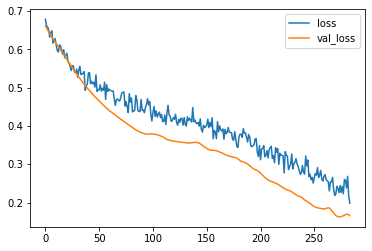

In [20]:
losses.plot()

### Model Evaluation

In [21]:
predictions = (model.predict(X_test_scaled) > 0.5).astype("int32")

In [22]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [23]:
print(confusion_matrix(Y_test,predictions))

[[11  2]
 [ 1 35]]


In [24]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.95      0.97      0.96        36

    accuracy                           0.94        49
   macro avg       0.93      0.91      0.92        49
weighted avg       0.94      0.94      0.94        49



In [25]:
print(accuracy_score(Y_test,predictions))

0.9387755102040817
